**Importing the Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

**Loading The Dataset**

In [4]:
df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
df.shape

(300698, 53)

**Descriptive Analysis**

In [6]:
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

* As we can observe from the above output there are many columns with missing values.Such columns has to be removed because such columns does'nt provide any information.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

**Feature Engineering**

In [8]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [9]:
df['Request_Closing_Time'] = df['Closed Date'] - df['Created Date']

Request_Closing_Time = []
for x in (df['Closed Date'] - df['Created Date']):
    close = x.total_seconds()/60
    Request_Closing_Time.append(close)
    
df['Request_Closing_Time'] = Request_Closing_Time

* A new column 'Request Closing Time' has been created from the columns 'Created Date' and 'Closed Date'.
* This new column depicts the amount of time taken by the authorities to close the complaint.

**Exploratory Data Analysis**

<AxesSubplot: xlabel='Request_Closing_Time', ylabel='Density'>

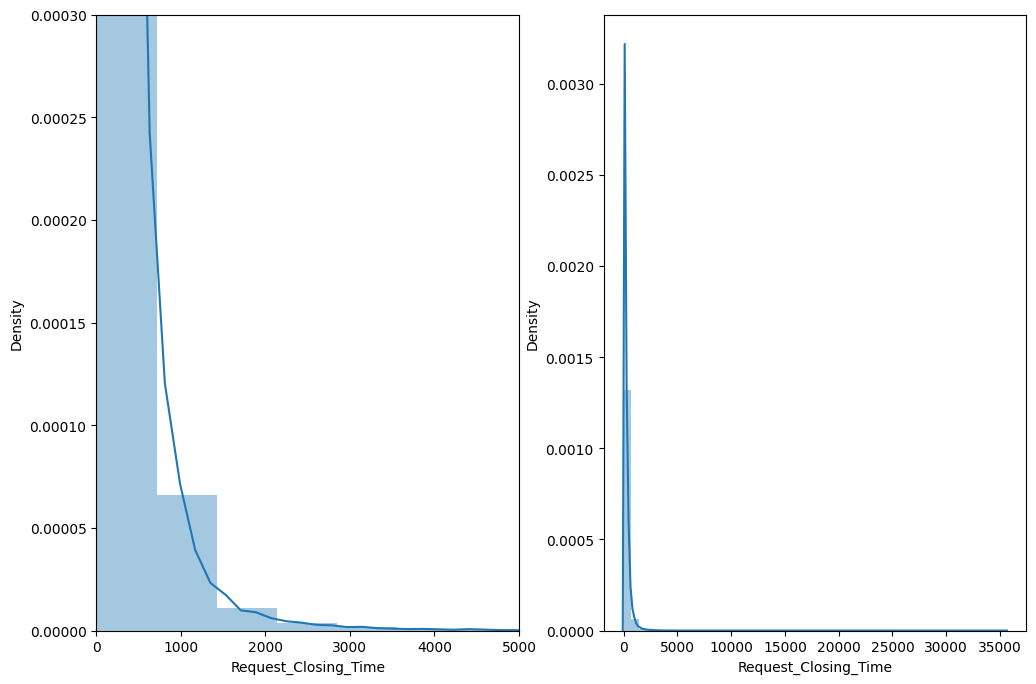

In [10]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.distplot(df['Request_Closing_Time'])
plt.xlim((0,5000))
plt.ylim((0,0.0003))

plt.subplot(1,2,2)
sns.distplot(df['Request_Closing_Time'])

In [11]:
print('Total number of Concerns:',len(df),'\n')
print('Percentage of request that took less than 100 hrs to get solved'
      ,round(((len(df) - (df['Request_Closing_Time']>100).sum())/ len(df))*100,2),'%')
      
print('Percentage of request that took less than 1000 hrs to get solved'
      ,round(((len(df) - (df['Request_Closing_Time']>1000).sum())/ len(df))*100,2),'%')

Total number of Concerns: 300698 

Percentage of request that took less than 100 hrs to get solved 33.32 %
Percentage of request that took less than 1000 hrs to get solved 97.19 %


From the above graph and calculation we can conclude that the graph is heavily skewed as there are lot of outliers.

In [12]:
print('Major Complaints \n')
print(df['Complaint Type'].value_counts()[:10])

Major Complaints 

Blocked Driveway           77044
Illegal Parking            75361
Noise - Street/Sidewalk    48612
Noise - Commercial         35577
Derelict Vehicle           17718
Noise - Vehicle            17083
Animal Abuse                7778
Traffic                     4498
Homeless Encampment         4416
Noise - Park                4042
Name: Complaint Type, dtype: int64


<AxesSubplot: >

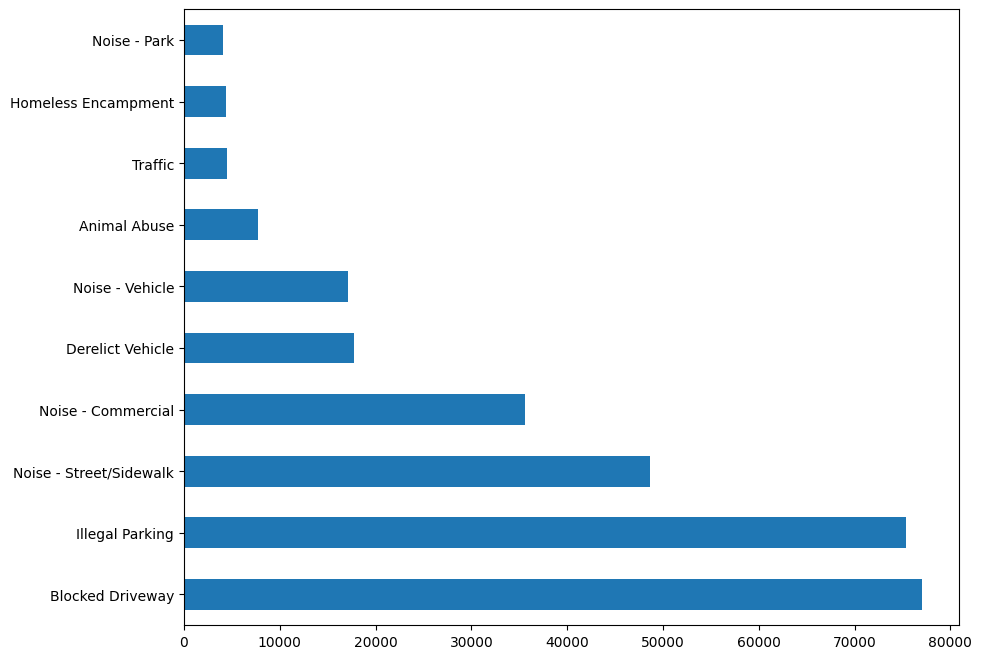

In [13]:
plt.figure(figsize=(10,8))
df['Complaint Type'].value_counts()[:10].plot(kind='barh')


In [14]:

major_complaints=['Blocked Driveway',
'Illegal Parking','Noise - Street/Sidewalk',
'Noise - Commercial',
'Derelict Vehicle',
'Noise - Vehicle',
'Animal Abuse',
'Traffic',
'Homeless Encampment',
'Noise - Park']
for x in major_complaints:
    print("Percentage of complaints from",x," type : ",round((df["Complaint Type"]==x).sum()/len(df)*100,2))

Percentage of complaints from Blocked Driveway  type :  25.62
Percentage of complaints from Illegal Parking  type :  25.06
Percentage of complaints from Noise - Street/Sidewalk  type :  16.17
Percentage of complaints from Noise - Commercial  type :  11.83
Percentage of complaints from Derelict Vehicle  type :  5.89
Percentage of complaints from Noise - Vehicle  type :  5.68
Percentage of complaints from Animal Abuse  type :  2.59
Percentage of complaints from Traffic  type :  1.5
Percentage of complaints from Homeless Encampment  type :  1.47
Percentage of complaints from Noise - Park  type :  1.34


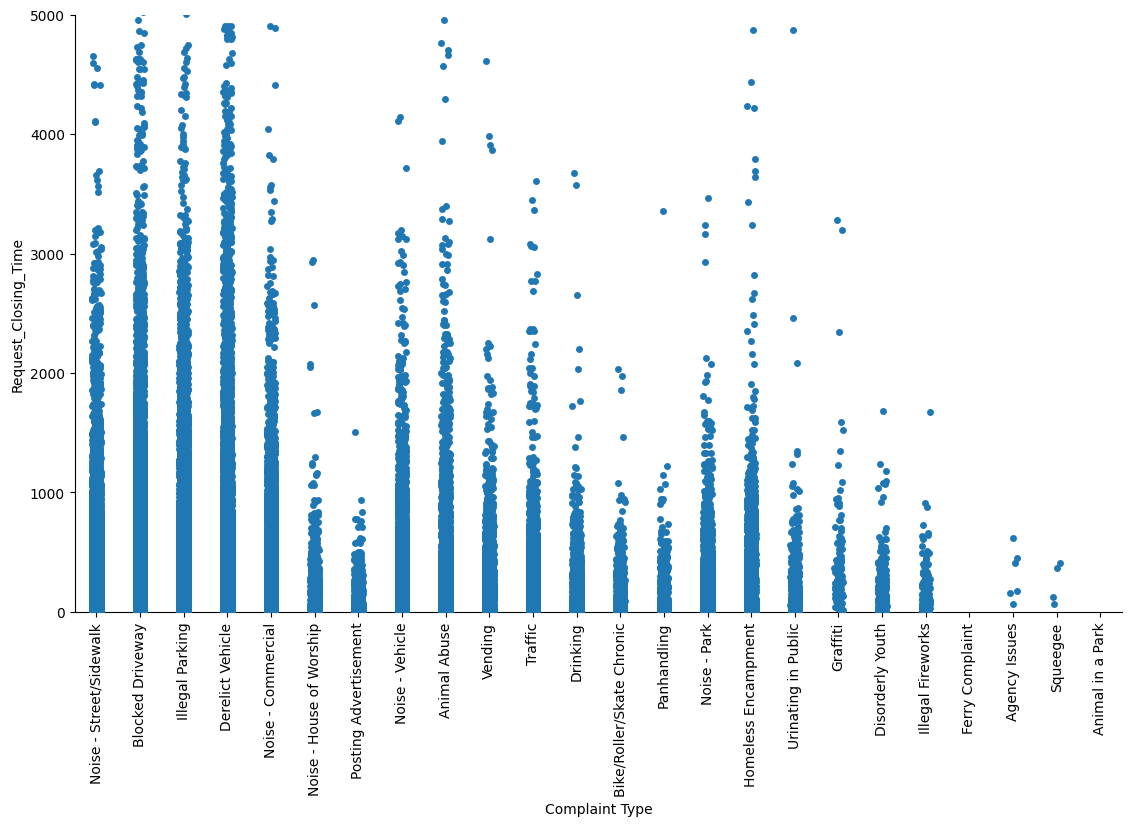

In [15]:
g=sns.catplot(x='Complaint Type',y = 'Request_Closing_Time',data=df)
g.fig.set_figwidth(15)
g.fig.set_figheight(7)
plt.xticks(rotation=90)
plt.ylim((0,5000))
plt.show()

*Insights*

It can be observed that almost 85% of the complaints belong to **traffic**(Blocked Driveway,illegal parking,traffic,noise-vehicle,derelict vehicle).From this plot we can understand that these traffic related problems has taken more time to resolve.So government should take measures to solve the traffic related issues

In [16]:
df.groupby(['Borough','Complaint Type','Descriptor']).size()

Borough      Complaint Type         Descriptor               
BRONX        Animal Abuse           Chained                      132
                                    In Car                        36
                                    Neglected                    673
                                    No Shelter                    71
                                    Other (complaint details)    311
                                                                ... 
Unspecified  Noise - Vehicle        Engine Idling                 11
             Posting Advertisement  Vehicle                        1
             Traffic                Truck Route Violation          1
             Vending                In Prohibited Area             2
                                    Unlicensed                     5
Length: 288, dtype: int64

In [17]:
df['City'].value_counts()[:10]

BROOKLYN         98307
NEW YORK         65994
BRONX            40702
STATEN ISLAND    12343
JAMAICA           7296
ASTORIA           6330
FLUSHING          5971
RIDGEWOOD         5163
CORONA            4295
WOODSIDE          3544
Name: City, dtype: int64

Percentage of complaints from these cities: 83.85 %


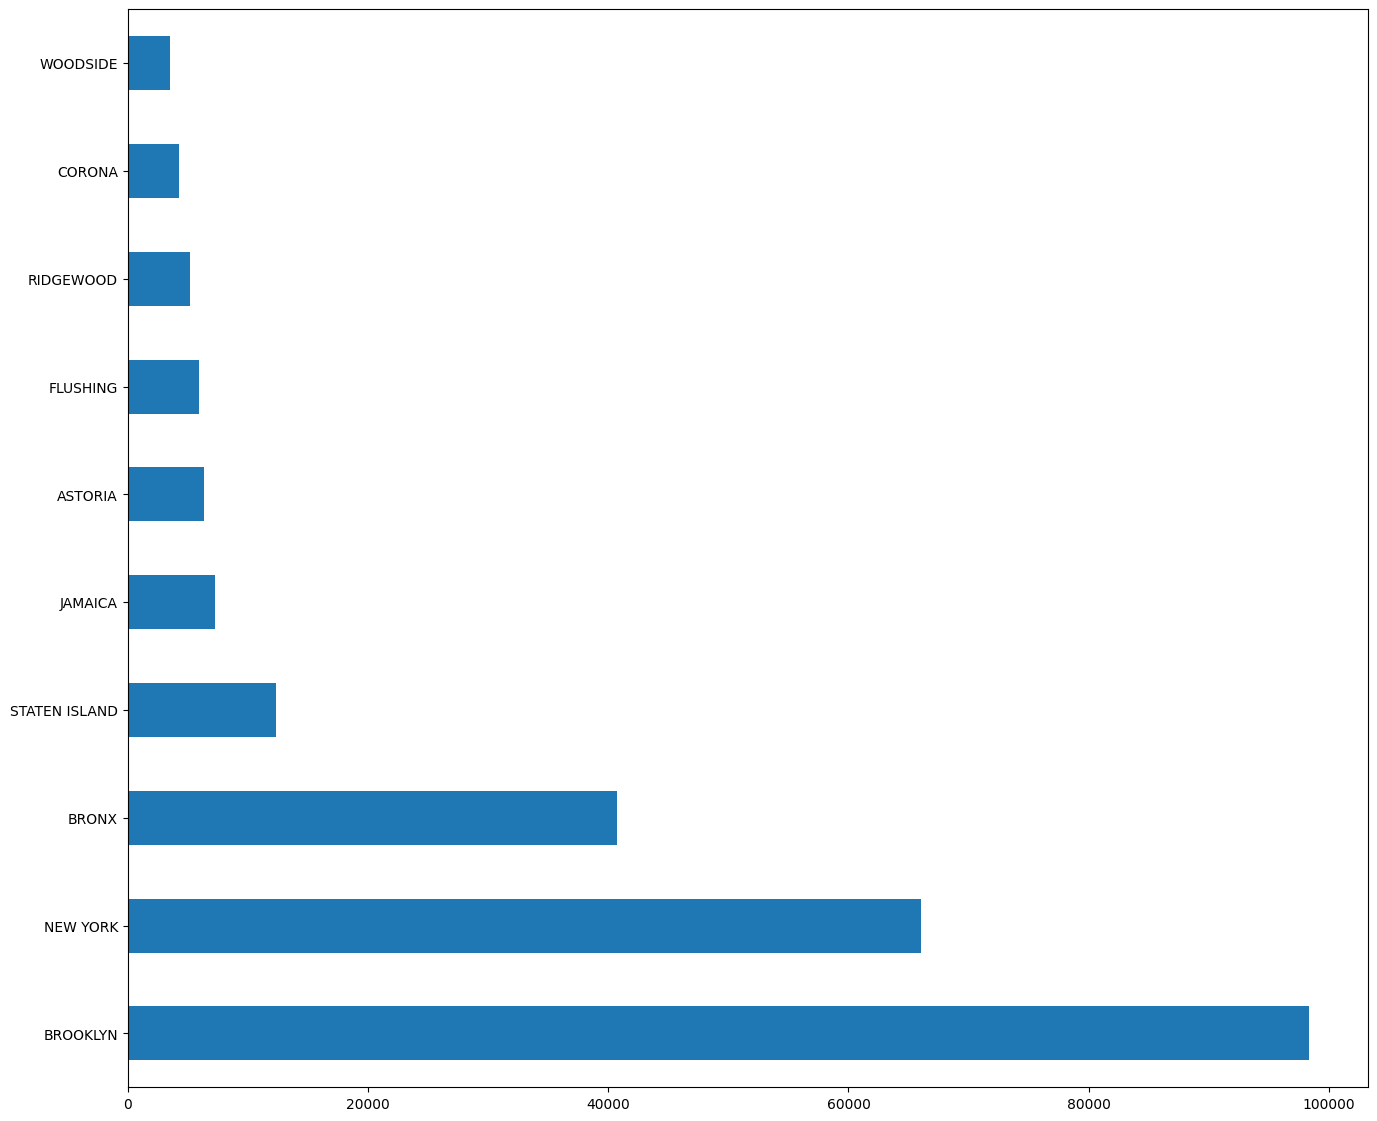

In [18]:
plt.figure(figsize=(16,14))
df['City'].value_counts()[:10].plot(kind='barh')
print("Percentage of complaints from these cities:",
      round((df['City'].value_counts()[:10].sum())/(df['City'].value_counts().sum())*100,2),'%')

* 84% of the complaints are from these cities.
* Brooklyn,New York,Bronx tops the list in the number of complaints.

Percentage of complaints closed: 99.26 %


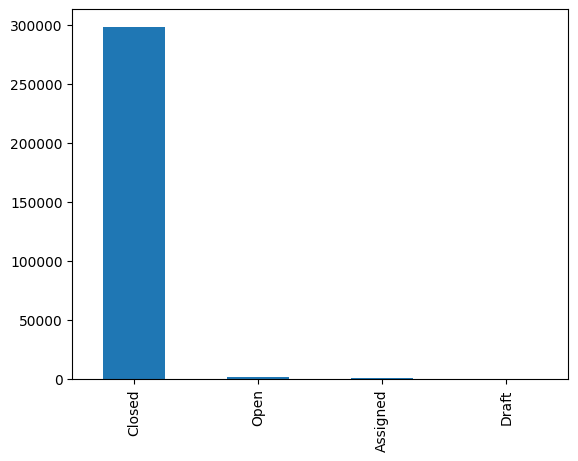

In [19]:
df['Status'].value_counts().plot(kind='bar')
print("Percentage of complaints closed:",
      round((df['Status'].value_counts()['Closed']/  df['Status'].value_counts().sum())*100,2),'%')

In [20]:
print("Percentage of complaints closed:",
      round((df['Status'].value_counts()['Closed']/  df['Status'].value_counts().sum())*100,2),'%')

Percentage of complaints closed: 99.26 %


99% of the complaints are in closed state.So it can be concluded that the authorities are doing good job by solving the complaints in the given time as the result of which 99.26% of the complaint status is in closed state.

Percentage of request from MANHATTAN division 21.99 %
Percentage of request from QUEENS division 26.82 %
Percentage of request from BRONX division 13.54 %
Percentage of request from BROOKLYN division 32.69 %
Percentage of request from Unspecified division 0.86 %
Percentage of request from STATEN ISLAND division 4.1 %


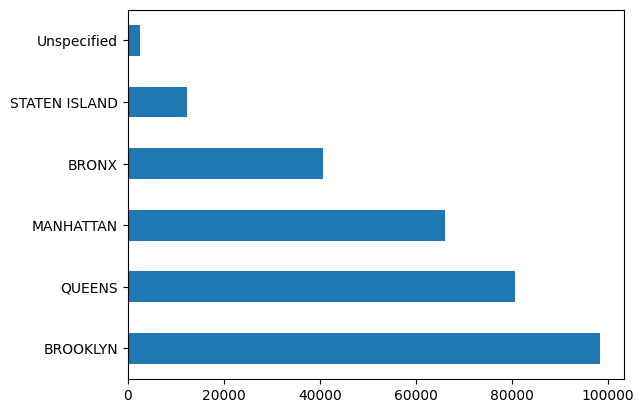

In [21]:
df['Borough'].value_counts().plot(kind='barh')
for x in df['Borough'].unique():
    print("Percentage of request from",x,"division",round((df['Borough']==x).sum()/len(df)*100,2),"%")

BROOKLYN,QUEENS,MANHATTAN contributes to most of the complaints.

                            Request_Closing_Time
Location Type                                   
Subway Station                        142.250980
Club/Bar/Restaurant                   186.074330
House of Worship                      191.833279
Store/Commercial                      198.089073
Park/Playground                       207.137129
Highway                               223.424221
Bridge                                229.158333
Roadway Tunnel                        266.525714
Street/Sidewalk                       268.515306
Residential Building                  289.089941
House and Store                       300.795699
Residential Building/House            309.505679
Parking Lot                           320.130342
Commercial                            320.566129
Vacant Lot                            448.435498
Park                                20210.083333
Ferry                                        NaN
Terminal                                     NaN


<AxesSubplot: ylabel='Location Type'>

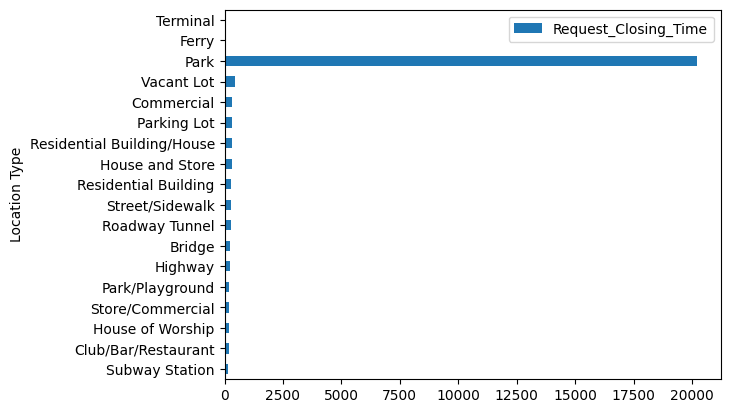

In [22]:
#Analyzing the complaints based on the location type
p1=pd.DataFrame(df.groupby(['Location Type'])["Request_Closing_Time"].mean()).sort_values('Request_Closing_Time')
print(p1)
p1.plot(kind='barh')

* The maximum mean time in resolving a complaint is taken in Park,Vacant Lot,Commercial,Parking Lot,Residential Building

                           Request_Closing_Time
Complaint Type                                 
Posting Advertisement                118.548200
Illegal Fireworks                    165.668353
Noise - Commercial                   188.829266
Noise - House of Worship             191.597901
Noise - Park                         204.643950
Noise - Street/Sidewalk              206.713445
Traffic                              206.920867
Disorderly Youth                     213.515035
Noise - Vehicle                      215.339604
Urinating in Public                  217.599859
Bike/Roller/Skate Chronic            225.987736
Drinking                             231.709974
Vending                              240.835121
Squeegee                             242.737500
Homeless Encampment                  261.934209
Panhandling                          262.366066
Illegal Parking                      270.069091
Blocked Driveway                     284.454311
Animal Abuse                         312

<AxesSubplot: ylabel='Complaint Type'>

<Figure size 1600x1800 with 0 Axes>

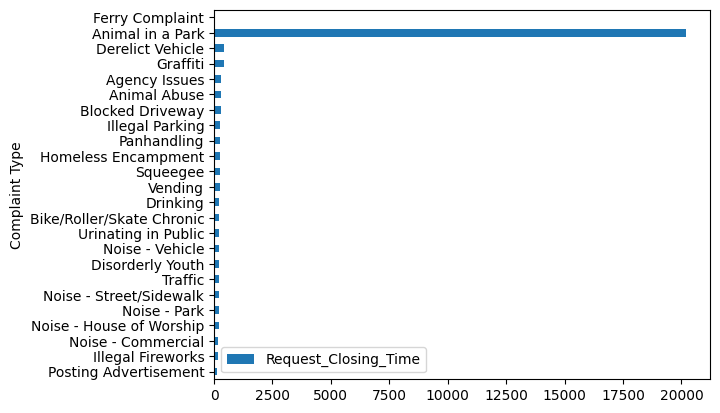

In [23]:
plt.figure(figsize=(16,18))
q1=pd.DataFrame(df.groupby(['Complaint Type'])["Request_Closing_Time"].mean()).sort_values('Request_Closing_Time')
print(q1)

q1.plot(kind='barh')

* Animal in a Park is one such complaint which requires more time in resolving. The authorities should take it into consideration

In [24]:
r1=pd.DataFrame(df.groupby('City')['Request_Closing_Time'].mean()).sort_values('Request_Closing_Time')
print(r1)


                     Request_Closing_Time
City                                     
ARVERNE                        135.895606
ROCKAWAY PARK                  139.133736
LITTLE NECK                    154.660316
OAKLAND GARDENS                157.853146
BAYSIDE                        160.759992
FAR ROCKAWAY                   167.399774
NEW YORK                       178.357371
FLUSHING                       181.081826
FOREST HILLS                   193.449032
CORONA                         193.670512
WHITESTONE                     194.688843
FRESH MEADOWS                  195.843207
COLLEGE POINT                  196.417842
JACKSON HEIGHTS                196.419964
CENTRAL PARK                   197.658591
ELMHURST                       198.631095
REGO PARK                      207.665668
BREEZY POINT                   209.789444
EAST ELMHURST                  214.659709
STATEN ISLAND                  232.796699
Howard Beach                   241.750000
BROOKLYN                       242

**Handling Missing Values**

In [25]:
pd.DataFrame((df.isnull().sum()/df.shape[0]*100)).sort_values(0,ascending=False)[:20]

,0
School or Citywide Complaint,100.000000
Garage Lot Name,100.000000
Vehicle Type,100.000000
Taxi Pick Up Location,100.000000
Taxi Company Borough,100.000000
Ferry Direction,99.999667
Ferry Terminal Name,99.999335
Road Ramp,99.929165
Bridge Highway Segment,99.929165
Bridge Highway Direction,99.919188


In [26]:
#dropping columns which has more than 85% of rows as missing values.
df.drop(['School or Citywide Complaint',
'Garage Lot Name',
'Vehicle Type',
'Taxi Pick Up Location',
'Taxi Company Borough',
'Ferry Direction',
'Ferry Terminal Name',
'Road Ramp',
'Bridge Highway Segment',
'Bridge Highway Direction',
'Bridge Highway Name',
'Landmark',
'Intersection Street 2',
'Intersection Street 1'],axis=1,inplace=True)

* In the above step the columns which has more than 85 % missing values has been removed.

In [27]:
df.shape

(300698, 40)

In [28]:
rem = []
for x in df.columns.tolist():
    if df[x].nunique() <=3:
        print(x + " "*10 + ":"  ,df[x].unique())
        rem.append(x)

Agency          : ['NYPD']
Agency Name          : ['New York City Police Department' 'NYPD' 'Internal Affairs Bureau']
Facility Type          : ['Precinct' nan]
Park Facility Name          : ['Unspecified' 'Alley Pond Park - Nature Center']
School Name          : ['Unspecified' 'Alley Pond Park - Nature Center']
School Number          : ['Unspecified' 'Q001']
School Region          : ['Unspecified' nan]
School Code          : ['Unspecified' nan]
School Phone Number          : ['Unspecified' '7182176034']
School Address          : ['Unspecified' 'Grand Central Parkway, near the soccer field']
School City          : ['Unspecified' 'QUEENS']
School State          : ['Unspecified' 'NY']
School Zip          : ['Unspecified' nan]
School Not Found          : ['N']


* The data above does'nt have much details and are Unspecified. So these columns can be removed

In [29]:
df.drop(rem,axis=1,inplace=True)

In [30]:
df.shape

(300698, 26)

In [31]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Complaint Type',
       'Descriptor', 'Location Type', 'Incident Zip', 'Incident Address',
       'Street Name', 'Cross Street 1', 'Cross Street 2', 'Address Type',
       'City', 'Status', 'Due Date', 'Resolution Description',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Borough', 'Latitude', 'Longitude', 'Location',
       'Request_Closing_Time'],
      dtype='object')

* The columns that are not required for our analysis have been removed in the following step

In [32]:
df.drop(['Unique Key','Descriptor','Street Name', 'Cross Street 1', 'Cross Street 2',"Due Date","Resolution Description","Resolution Action Updated Date","Community Board","X Coordinate (State Plane)","Y Coordinate (State Plane)","Park Borough","Latitude","Longitude","Location"],axis=1,inplace=True)

In [33]:
df.head(
)

,Created Date,Closed Date,Complaint Type,Location Type,Incident Zip,Incident Address,Address Type,City,Status,Borough,Request_Closing_Time
0,2015-12-31 23:59:45,2016-01-01 00:55:00,Noise - Street/Sidewalk,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,ADDRESS,NEW YORK,Closed,MANHATTAN,55.250000
1,2015-12-31 23:59:44,2016-01-01 01:26:00,Blocked Driveway,Street/Sidewalk,11105.0,27-07 23 AVENUE,ADDRESS,ASTORIA,Closed,QUEENS,86.266667
2,2015-12-31 23:59:29,2016-01-01 04:51:00,Blocked Driveway,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,ADDRESS,BRONX,Closed,BRONX,291.516667
3,2015-12-31 23:57:46,2016-01-01 07:43:00,Illegal Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,ADDRESS,BRONX,Closed,BRONX,465.233333
4,2015-12-31 23:56:58,2016-01-01 03:24:00,Illegal Parking,Street/Sidewalk,11373.0,87-14 57 ROAD,ADDRESS,ELMHURST,Closed,QUEENS,207.033333


In [34]:
df.shape

(300698, 11)

**Hypothesis Testing**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, 'Noise - Street/Sidewalk'),
  Text(1, 0, 'Blocked Driveway'),
  Text(2, 0, 'Illegal Parking'),
  Text(3, 0, 'Derelict Vehicle'),
  Text(4, 0, 'Noise - Commercial'),
  Text(5, 0, 'Noise - House of Worship'),
  Text(6, 0, 'Posting Advertisement'),
  Text(7, 0, 'Noise - Vehicle'),
  Text(8, 0, 'Animal Abuse'),
  Text(9, 0, 'Vending'),
  Text(10, 0, 'Traffic'),
  Text(11, 0, 'Drinking'),
  Text(12, 0, 'Bike/Roller/Skate Chronic'),
  Text(13, 0, 'Panhandling'),
  Text(14, 0, 'Noise - Park'),
  Text(15, 0, 'Homeless Encampment'),
  Text(16, 0, 'Urinating in Public'),
  Text(17, 0, 'Graffiti'),
  Text(18, 0, 'Disorderly Youth'),
  Text(19, 0, 'Illegal Fireworks'),
  Text(20, 0, 'Ferry Complaint'),
  Text(21, 0, 'Agency Issues'),
  Text(22, 0, 'Squeegee'),
  Text(23, 0, 'Animal in a Park')])

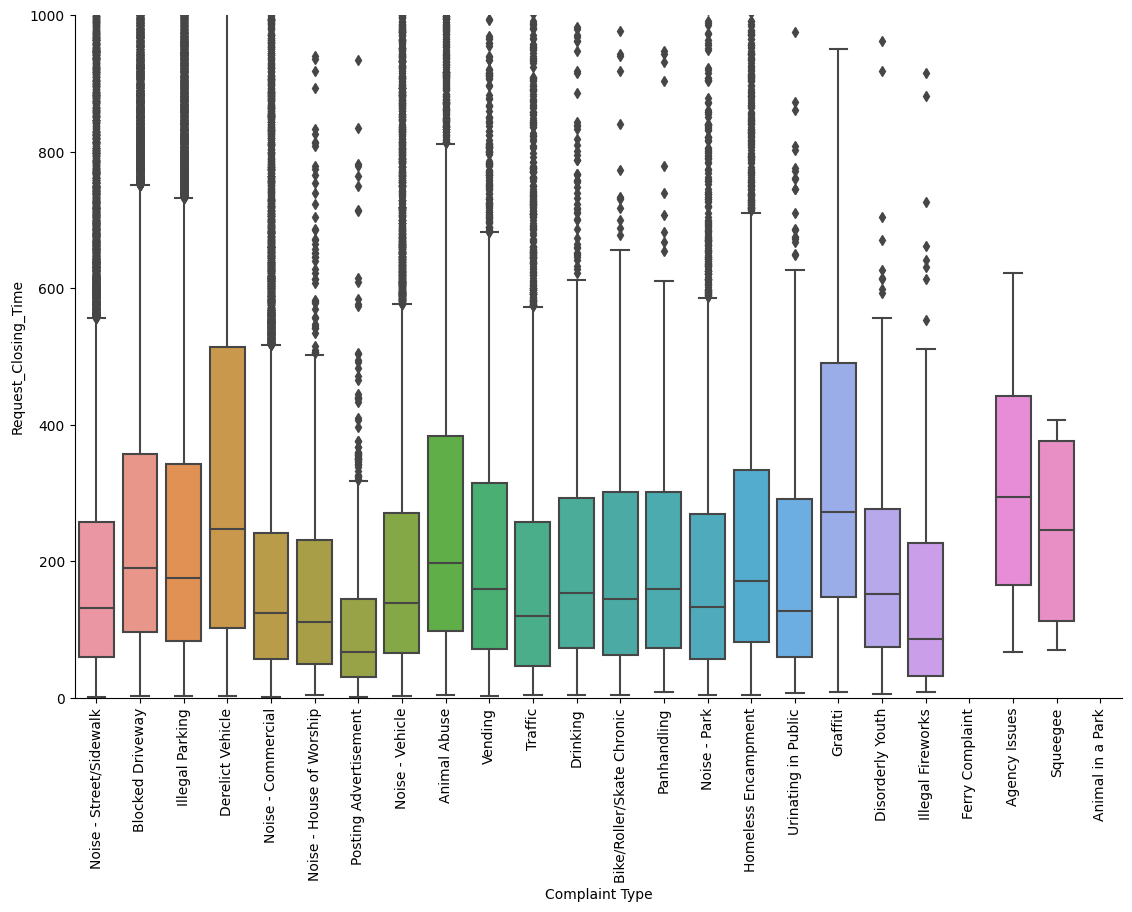

In [35]:
g=sns.catplot(x='Complaint Type',y='Request_Closing_Time',data = df,kind='box')
g.fig.set_figheight(8)
g.fig.set_figwidth(15)
plt.ylim((0,1000))
plt.xticks(rotation=90)

* H0 : There is no significant difference in the mean of Request Closing Time for different complaint.
* H1 : There is significant difference in the mean of Request Closing Time for different complaints.

* Whether the average response time across complaint types is similar or not (overall)?
* Request Closing time is a continous value,Complaint Type is a Categorical Value with more than two categories. So the best type of test would be ANOVA test


In [36]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

anova_df = pd.DataFrame()
anova_df['Request_Closing_Time'] = df['Request_Closing_Time']
anova_df['Complaint_Type'] = df['Complaint Type']
anova_df.head()

,Request_Closing_Time,Complaint_Type
0,55.250000,Noise - Street/Sidewalk
1,86.266667,Blocked Driveway
2,291.516667,Blocked Driveway
3,465.233333,Illegal Parking
4,207.033333,Illegal Parking


In [37]:
lm=ols("Request_Closing_Time~Complaint_Type",data=anova_df).fit()
table=sm.stats.anova_lm(lm)
table


,df,sum_sq,mean_sq,F,PR(>F)
Complaint_Type,23.0,1.455109e+09,6.326559e+07,491.841605,0.0
Residual,298511.0,3.839747e+10,1.286300e+05,NaN,NaN


* Level of Significance = 0.05
* Here p-value is less than the level of significance.Therefor we reject the null hyphothesis and accept the alternate hypothesis.
* Therefore We can conclude that There is significant difference in the mean of Request Closing Time for different complaints.
*****************************************************************************************************

* Since both are categorical values.This Hypothesis would be tested using Chi-Square Test
* H0: Complaint Type and Location Type are independent
* H1: Complaint Type and Location Type are related

In [38]:
chi_square = pd.DataFrame()
chi_square['Complaint Type'] = df['Complaint Type']
chi_square['Location Type'] = df['Location Type']
chi_square.dropna(inplace=True)

In [39]:
data_crosstab = pd.crosstab(chi_square['Location Type'],chi_square['Complaint Type'])

In [40]:
from scipy.stats import chi2_contingency 
stat, p, dof, expected = chi2_contingency(data_crosstab) 
alpha = 0.05
if p <= alpha: 
    print('Dependent (reject H0)') 
else: 
    print('Independent (H0 holds true)') 

Dependent (reject H0)


* The null Hypothesis has been rejected and alternate hypothesis has been accepted
* Complaint Type and Location Type are dependent on each other